<a href="https://colab.research.google.com/github/jorgev898/Perceptron-IA/blob/main/Cuaderno_1_RN_El_Perceptron.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Cuaderno 1. El perceptrón

Un perceptrón es un modelo matemático inspirado en las redes neuronales del cerebro humano y se utiliza en el campo del aprendizaje automático y la inteligencia artificial. Fue introducido en 1958 por Frank Rosenblatt como una forma de modelar cómo las neuronas procesan información y toman decisiones.


Concepto básico:
Un perceptrón es el tipo más simple de red neuronal, compuesto por:

**Entradas ($𝑥_1,𝑥_2,...,𝑥_𝑛$)**: Representan las características del problema que queremos resolver.

**Pesos ($𝑤_1,𝑤_2,...,𝑤_𝑛$):** Valores asociados a cada entrada que determinan la importancia de cada característica.

**Suma ponderada:** Se calcula como
$𝑧=𝑤_1𝑥_1+𝑤_2𝑥_2+...+𝑤_𝑛𝑥_𝑛+𝑏$, donde 𝑏 es un sesgo (bias) que ajusta el modelo.

**Función de activación:** Toma el resultado de la suma ponderada y produce una salida, generalmente una de dos opciones (como 0 o 1). La función de activación original en el perceptrón era una función escalón que activaba la salida si 𝑧 superaba un umbral.

**Funcionamiento:**

El perceptrón se utiliza para clasificación binaria, es decir, para decidir entre dos categorías. Si la salida es 1, pertenece a una categoría; si es 0, pertenece a la otra.

**Limitaciones:**
Linealidad: Un perceptrón solo puede resolver problemas que sean linealmente separables, es decir, donde una línea recta (o un hiperplano en dimensiones mayores) pueda dividir los datos en dos clases.

No captura relaciones complejas: No puede resolver problemas como el famoso XOR, donde los datos no son linealmente separables.

**Evolución:**
El perceptrón es la base de las redes neuronales artificiales modernas, donde se utilizan perceptrones múltiples en capas para formar redes más complejas capaces de resolver problemas no lineales. Este enfoque se llama redes neuronales multicapa (o MLP, por sus siglas en inglés).


![imagen](https://github.com/adiacla/bigdata/blob/master/perceptron.png?raw=true)


# Taller del Perceptrón

 Este cuerdno permite la introducción para aprender implementar un perceptrón desde cero (maulmente) y luego con la biblioteca scikit-learn en Python para resolver problemas de clasificación binaria.

##Datos y visualización:

Se crean datos de ejemplo sobre estudiantes con dos características: notas de IA y PGA (calificiacón IA y el Promedio General Acumulado).

Los datos se representan gráficamente usando matplotlib, diferenciando entre los que se gradúan (etiquetados como 1) y los que se retiran (etiquetados como 0).

Se visualiza la dispersión de los puntos con diferentes colores y formas según su clase.

##Perceptrón básico:

Se implementa una función de activación (escalón) que toma un conjunto de pesos y calcula la salida en función de la entrada.
La salida es 1 si la combinación ponderada de las entradas supera un umbral, y 0 en caso contrario.
Luego, se inicializan aleatoriamente los pesos y el sesgo y se aplica la activación para ver cómo se comporta el modelo con entradas dadas.
Entrenamiento del Perceptrón:

El perceptrón se entrena iterativamente en un ciclo de épocas. Durante cada época, el modelo ajusta los pesos en función del error de predicción (diferencia entre el valor real y el predicho).

El error total se calcula y se ajustan los pesos utilizando una tasa de aprendizaje (learning rate)
.
Este proceso se repite hasta que el error se minimice.

##Implementación con scikit-learn:

Se utiliza el Perceptron de scikit-learn para entrenar el modelo con las mismas entradas. Este modelo implementa una versión optimizada y fácil de usar.

Se ajustan los parámetros como la tasa de aprendizaje, el número máximo de iteraciones (max_iter), y el criterio de convergencia utilizando tol (tolerancia).

Se entrenan los datos y se evalúa el modelo con predicciones sobre nuevos puntos.

También se obtiene el coeficiente y el sesgo del modelo entrenado, así como el número de iteraciones que utilizó.

##Escalado de datos y modelos en conjunto con scikit-learn:

Antes de entrenar un modelo con scikit-learn, se escalaban los datos usando StandardScaler para normalizar las características y mejorar el rendimiento del modelo.
Se divide el conjunto de datos en entrenamiento y prueba usando train_test_split.

##Evaluación del modelo:

Se evaluó el modelo utilizando métricas como la precisión (accuracy), la matriz de confusión (para ver los aciertos y errores de clasificación), y el informe de clasificación.

Se muestra la curva ROC y se calcula el Área Bajo la Curva (AUC) como una medida adicional de la calidad del modelo.

#Uso de técnicas avanzadas:

Se menciona el uso de técnicas como early stopping, que detiene el entrenamiento del modelo cuando ya no se observa mejora en la precisión.

También se implementan evaluaciones comparativas entre precisión y AUC, explicando cómo cada una puede ofrecer diferentes perspectivas sobre el rendimiento del modelo.

Este código cubre un ciclo completo de trabajo con perceptrones, desde la implementación más básica hasta el uso de modelos optimizados y técnicas avanzadas en scikit-learn. Es un excelente ejercicio para entender cómo funcionan los perceptrones y cómo se pueden evaluar y ajustar los modelos de clasificación binaria.





##Importar librerias y Preparación de datos

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# ======================
# 1. Preparación de los Datos
# ======================
# Datos de estudiantes representados como [notas_IA, PGA], con valores normalizados entre 0 y 1.
alumnos = np.array([[0.3, 0.4], [0.4, 0.3],
                     [0.3, 0.2], [0.4, 0.1],
                     [0.5, 0.2], [0.4, 0.8],
                     [0.6, 0.8], [0.5, 0.6],
                     [0.7, 0.6], [0.8, 0.5]])

# Etiquetas de clase: 1 = Se gradúa, 0 = Se retira
clases = np.array([0, 0, 0, 0, 0, 1, 1, 1, 1, 1])

In [3]:
# prompt: cree un dataframe llamado df que una o haga stack de alumnos y clases donde el alumno la columna se llama nota ia, pga y la columna de clases se llama estado

import pandas as pd
import numpy as np

# Datos de ejemplo (reemplaza con tus datos reales)
alumnos = np.array([[0.3, 0.4], [0.4, 0.3],
                     [0.3, 0.2], [0.4, 0.1],
                     [0.5, 0.2], [0.4, 0.8],
                     [0.6, 0.8], [0.5, 0.6],
                     [0.7, 0.6], [0.8, 0.5]])
clases = np.array([0, 0, 0, 0, 0, 1, 1, 1, 1, 1])

# Crear DataFrames para alumnos y clases
df_alumnos = pd.DataFrame(alumnos, columns=['nota_ia', 'pga'])
df_clases = pd.DataFrame(clases, columns=['estado'])

# Concatenar los DataFrames
df = pd.concat([df_alumnos, df_clases], axis=1)

df


,nota_ia,pga,estado
0,0.3,0.4,0
1,0.4,0.3,0
2,0.3,0.2,0
3,0.4,0.1,0
4,0.5,0.2,0
5,0.4,0.8,1
6,0.6,0.8,1
7,0.5,0.6,1
8,0.7,0.6,1
9,0.8,0.5,1


In [ ]:
# Combinar los datos y las clases para facilitar la visualización
data = np.column_stack((alumnos, clases))

# Crear un DataFrame para análisis
columnas = ['Nota IA', 'GPA', 'Estado']
df = pd.DataFrame(data, columns=columnas)
print(df)


##Verificar si son linealmente separables

En la gráfica puede apreciarse si a través de una línea recta se pueden separar los estudiantes que se gradúan o se retiran

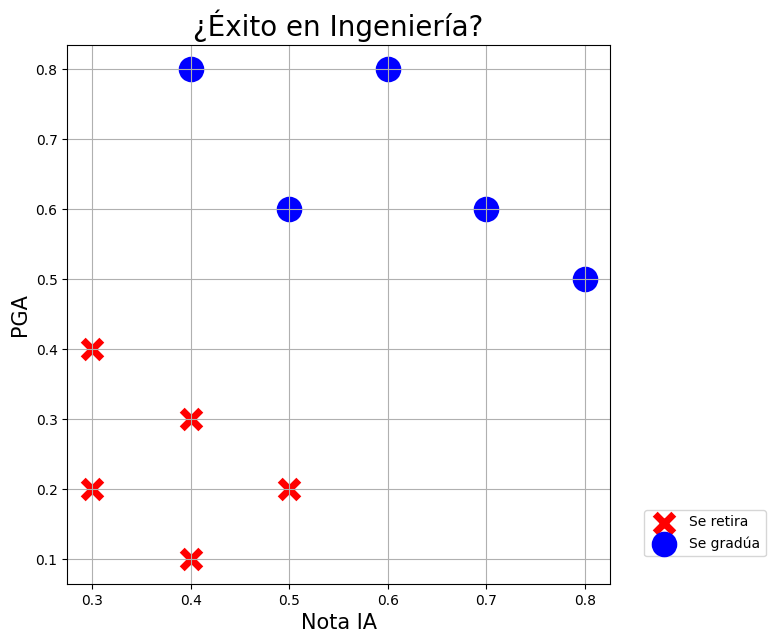

In [4]:

# ======================
# 2. Visualización de Datos
# ======================
plt.figure(figsize=(7, 7))
plt.title("¿Éxito en Ingeniería?", fontsize=20)
plt.scatter(alumnos[clases == 0].T[0],
            alumnos[clases == 0].T[1],
            marker="x", s=180, color="red",
            linewidths=5, label="Se retira")
plt.scatter(alumnos[clases == 1].T[0],
            alumnos[clases == 1].T[1],
            marker="o", s=180, color="blue",
            linewidths=5, label="Se gradúa")
plt.xlabel("Nota IA", fontsize=15)
plt.ylabel("PGA", fontsize=15)
plt.legend(bbox_to_anchor=(1.3, 0.15))
plt.grid()
plt.show()

#Implementación del perceptrón manualmente
##Definición de la función de activación

In [ ]:
# ======================
# 3. Implementación del Perceptrón
# ======================
# Función de activación (Escalón): Decide la clase basándose en la suma ponderada

def activacion(pesos, x, b):
    z = np.dot(pesos, x)
    return 1 if z + b > 0 else 0

#Recordar que z es la función suma y b es el bias.

\begin{align}
         & z= w_1 x_1 + w_2 x_2+b
\end{align}

![imagen](https://github.com/adiacla/bigdata/blob/master/FuncionEscalon.png?raw=true)

In [ ]:
# Establecer una semilla para reproducibilidad
np.random.seed(42)  # Puedes cambiar 42 por cualquier número entero

# Inicializar pesos y bias aleatorios
pesos = np.random.uniform(-1, 1, size=2)
b = np.random.uniform(-1, 1)
print("Pesos W1:", pesos[0], "   Pesos W2:", pesos[1])
print("Bias o umbral:", b)
#El aleatorio puede variar si cambia la semilla.

![imagen](https://github.com/adiacla/bigdata/blob/master/pesosybias.png?raw=true)

##Predicciones de pruebas
tenemos dos alumnos nuevos que tienen estos datosen las notas de IA y GPA (calificiacón IA y el Promedio General Acumulado)

a. [0.4, 0.3]
b. [0.8, 0.9]

Hagamos predicciones

In [ ]:
# Probar la activación con datos de ejemplo
print(f"Predicción para [0.4, 0.3]: {activacion(pesos, [0.4, 0.3], b)}")
print(f"Predicción para [0.8, 0.9]: {activacion(pesos, [0.8, 0.9], b)}")

Asi acabamos de hacer un pequeño perceptrón, pero es claro que el valor de w1,w2 y b fueron aleatorios y no están optimizados, ahora debemos entrenar.
 por lo tanto la predicción **es errada.**


Vamos a optimizar a partir del error de activación.

## Pseudocódigo del entrenamiento del Perceptrón

Haremos un ciclo para ir cambiando los datos de los pesos y el umbral, hasta tener el menor error aceptable (por ejemplo si es cero) o se terminen las epocas.

La tasa de aprendizaje es la tasa con la que se va actualizar los pesos, para que se vayan ajustando hasta que lleguen a valor mínimo de error, debemos probar con varias tasas.

##Algortimo

0. Inicializar los pesos y el umbral
1. inicia epocas máximas = 100 (Se puede modificar)
2. inicia epoca = 0
3. inicia tasa de aprendizaje = 0.01 (Se puede modificar)
4. Mientras (epoca < epocas máximas) hacer:
5.    Para cada instancia (o registro) de entrenamiento hacer:
          Calcula salida del perceptrón para esa estancia
          Calcula el error
          Actualiza pesos y umbral usando la tasa de aprendizaje, la instancia y el error
9.    epoca += 1

In [ ]:
# ======================
# 4. Entrenamiento del Perceptrón
# ======================
# Inicialización de parámetros
pesos = np.random.uniform(-1, 1, size=2)
b = np.random.uniform(-1, 1)
epocas = 100
tasa_de_aprendizaje = 0.01

# Ciclo de entrenamiento
for epoca in range(epocas):
    error_total = 0

    for i in range(len(alumnos)):
        # Realizar una predicción
        prediccion = activacion(pesos, alumnos[i], b)

        # Calcular el error
        error = clases[i] - prediccion
        error_total += error ** 2

        # Actualizar los pesos y el bias
        pesos += tasa_de_aprendizaje * error * alumnos[i]
        b += tasa_de_aprendizaje * error

    # Imprimir el error total por época
    print(f"Época {epoca + 1}: Error total = {error_total}")


Cómo se puede obervar desde la época 65 ya no tenemos errores, por lo tanto el modelo "convergio" a 0 errores en total a partir de ajustar los pesos y los bias.

##Época en el Entrenamiento de un Modelo
En el contexto del aprendizaje automático, una época se refiere a una iteración completa sobre el conjunto de datos de entrenamiento. Durante una época, el modelo:

* Toma cada instancia del conjunto de datos de entrenamiento.

* Calcula predicciones utilizando la función de activación.

* Actualiza los pesos y el umbral (o bias) en función del error cometido.

Un modelo puede necesitar varias épocas para que sus parámetros (pesos y umbral) se ajusten adecuadamente y minimicen el error de predicción.

##Cantidad de épocas necesarias

**Pocas épocas:** El modelo puede no aprender lo suficiente, resultando en un modelo subentrenado (underfitting).

**Demasiadas épocas:** El modelo puede aprender detalles específicos del conjunto de datos, lo que lleva a sobreentrenamiento (overfitting).


***Regla general:*** Comienza con un número moderado, como 100 o 500, y evalúa el desempeño. Si el error sigue disminuyendo, podrías aumentar las épocas.



##Tasa de Aprendizaje
La tasa de aprendizaje (𝜂) es un parámetro que controla la magnitud de los ajustes realizados a los pesos y al umbral después de cada predicción.

Es un número pequeño, típicamente en el rango de 0.001  a
0.1.
Determina qué tan rápido o lento aprende el modelo.

Fórmula de actualización de los pesos:
$$𝑤_{𝑛𝑢𝑒𝑣𝑜=𝑤𝑎𝑐𝑡𝑢𝑎𝑙}+𝜂⋅error⋅entrada$$

**Impacto del valor de la tasa de aprendizaje:**Tasa de aprendizaje muy alta (𝜂=0.5 o más):

El modelo puede ajustar demasiado rápido, dando lugar a oscilaciones alrededor de los valores ideales.

Podría no converger a una solución estable.

**Tasa de aprendizaje muy baja** (𝜂<=0.0001):

El modelo aprenderá muy lentamente.
Puede necesitar muchas épocas para alcanzar un error aceptable.


***Regla general:** Comienza con una tasa de aprendizaje entre
0.01 y 0.1.

***Ajusta según el comportamiento del modelo:**

Si el error no disminuye lo suficiente, incrementa ligeramente.

Si el error oscila o no converge, reduce el valor.


**Visualización del error:**

Traza una gráfica del error total frente al número de épocas.
Si el error disminuye de manera consistente y se estabiliza, los valores pueden ser adecuados.

Si el error oscila o se detiene prematuramente, ajusta la tasa de aprendizaje o incrementa las épocas.
![imagen](https://github.com/adiacla/bigdata/blob/master/epochs.png?raw=true)



**Validación cruzada:**

* Divide los datos en entrenamiento y validación.
* Ajusta la tasa de aprendizaje y el número de épocas para minimizar el error en el conjunto de validación, evitando el sobreentrenamiento.

**Uso de técnicas avanzadas:**

Implementa un programa que disminuya automáticamente la tasa de aprendizaje durante el entrenamiento si el modelo no mejora (decay learning rate).

Usa herramientas como grid search o random search para encontrar los mejores hiperparámetros.

**Analogía para Facilitar la Comprensión**

Piensa en la tasa de aprendizaje como el tamaño de los pasos de una persona y en las épocas como el número total de pasos en una caminata:

* Tasa de aprendizaje grande: Das zancadas largas, pero podrías pasar de largo el destino.
* Tasa de aprendizaje pequeña: Das pasos cortos, pero llegarás al destino más lentamente.

Épocas: Representan cuántos pasos estás dispuesto a dar para llegar a tu objetivo.

El equilibrio ideal depende del terreno (tus datos) y la distancia al destino (minimizar el error).



#Predecir el con perceptrón entrenado





In [ ]:
# Probar la activación con datos de ejemplo
print(f"Predicción para [0.4, 0.3]: {activacion(pesos, [0.4, 0.3], b)}")
print(f"Predicción para [0.8, 0.9]: {activacion(pesos, [0.8, 0.9], b)}")

En conclusión vemos cómo ahora la predicción para el alumno con las notas: [0.4, 0.3] es 0 es decir que se retira. Contratio al alumno [0.8, 0.9]: 1, que se gradua.

## Graficar las Zonas de aprobación

En la siguiete gráfica vemos cómo el modelo separa los que se graduan y los que se retirar, en una gráfica 2D, dados que es fácil apreciarlos porque tenemos solo dos carcteristicas (Notas IA y PGA). En el fondo de la gráfica notará unos puntos azules y otros rojos. Esas son las zonas de separación.

In [ ]:
# ======================
# 5. Visualización de la Clasificación
# ======================
plt.figure(figsize=(6, 5), dpi=200)
plt.title("¿Éxito en Ingeniería?", fontsize=20)

# Graficar los puntos de datos
plt.scatter(alumnos[clases == 0].T[0],
            alumnos[clases == 0].T[1],
            marker="x", s=180, color="red",
            linewidths=5, label="Se retira")
plt.scatter(alumnos[clases == 1].T[0],
            alumnos[clases == 1].T[1],
            marker="o", s=180, color="blue",
            linewidths=5, label="Se gradúa")

# Graficar las regiones de decisión
for nota in np.arange(0, 1, 0.05):
    for GPA in np.arange(0, 1, 0.05):
        color = activacion(pesos, [nota, GPA], b)
        plt.scatter(nota, GPA, marker="s", s=10,
                    color="blue" if color == 1 else "red",
                    alpha=0.2, linewidths=0)

plt.xlabel("Nota IA", fontsize=15)
plt.ylabel("PGA", fontsize=15)
plt.legend(bbox_to_anchor=(1.3, 0.15))
plt.grid()
plt.show()


#Perceptrón con Scikit-learn

El objetivo es replicar la lógica de un perceptrón manual, pero utilizando la implementación optimizada que proporciona la biblioteca scikit-learn. Esto nos permitirá realizar tareas similares con menos esfuerzo, mayor optimización, y acceso a métricas adicionales.



Explicación de los pasos
1. Importación de bibliotecas
Primero, importamos las bibliotecas necesarias:

**Perceptron de sklearn.linear_model:** Clase que implementa el algoritmo del perceptrón.

**numpy:** Para trabajar con los datos en forma de matrices.



In [ ]:
from sklearn.linear_model import Perceptron
import numpy as np

##Datos de entrenamiento
Usamos los mismos datos de entrenamiento del ejemplo anterior. Estos datos contienen:

X_train: Las características de los alumnos (notas_IA y PGA).
y_train: Las etiquetas de clase (0: "Se retira", 1: "Se gradúa").

In [ ]:
# Datos de entrenamiento
X_train = alumnos  # Características
y_train = clases   # Etiquetas

##Creación del modelo
Creamos una instancia de la clase Perceptron.

Algunos parámetros importantes:

verbose=True: Muestra información sobre el progreso del entrenamiento.

Otros parámetros opcionales (no utilizados aquí):

max_iter: Número máximo de épocas. Por defecto,
1000.

eta0: Tasa de aprendizaje inicial. Por defecto,
1.0

In [ ]:
# Crear el modelo de Perceptrón
perceptron = Perceptron(verbose=True)

##Entrenamiento del modelo

El método fit ajusta el modelo al conjunto de datos de entrenamiento. Internamente:

* Inicializa pesos y bias.

* Itera por los datos, ajustando los pesos en función del error.

In [ ]:
# Entrenar el modelo
perceptron.fit(X_train, y_train)

## Realización de predicciones

El método predict se usa para predecir la clase de nuevos datos. Aquí realizamos predicciones para dos instancias nuevas:

[0.2,0.2]: Características bajas.

[0.8,0.8]: Características altas

In [ ]:
# Predicciones con datos nuevos
predictions = perceptron.predict([[0.2, 0.2], [0.8, 0.8]])
print("Predicciones:", predictions)


##Inspección del modelo entrenado

Después del entrenamiento, se pueden consultar varias propiedades del modelo:

* n_iter_: Número de iteraciones realizadas (épocas).
coef_: Pesos aprendidos (𝑤1 ,𝑤2, etc.).

* intercept_: El bias o umbral.

* n_features_in_: Número de características usadas en el entrenamiento.


In [ ]:
perceptron

In [ ]:
# Consultar información del modelo
print("Épocas realizadas:", perceptron.n_iter_)
print("Pesos aprendidos:", perceptron.coef_)
print("El bias es:", perceptron.intercept_)
print("Número de características utilizadas:", perceptron.n_features_in_)


In [ ]:
#permite saber las clases que predice
perceptron.classes_

##Ajustando parámetros

1. learning_rate (Tasa de aprendizaje)

En el Perceptrón de sklearn, no configuramos directamente el learning rate, pero se controla implícitamente a través de la tasa inicial (𝜂0 ) y del algoritmo de optimización.

En el perceptrón estándar, esta tasa define cuánto se ajustan los pesos en cada iteración en función del error.

2. max_iter (Número máximo de iteraciones o épocas)

Especifica el número máximo de iteraciones sobre los datos de entrenamiento. Si el modelo converge antes, el entrenamiento puede detenerse prematuramente.

**Ajustar este parámetro es clave:**

* Valores bajos: Entrenamiento rápido pero puede no alcanzar la convergencia.
* Valores altos: Entrenamiento más largo con mayores posibilidades de convergencia.

3. tol (Tolerancia)

Es el valor límite que define si el algoritmo ha convergido.
Cuando la reducción del error entre épocas sucesivas es menor que este valor, el entrenamiento se detiene.

**Valores comunes:**

* tol=1e-3 (0.001): Tolerancia estándar.
* Valores menores (ej., 1e-5) permiten más precisión pero aumentan el tiempo de entrenamiento.

4. random_state (Semilla aleatoria)

Determina el estado inicial del generador de números aleatorios utilizado para inicializar pesos.

**Es útil para:**

* Reproducibilidad: Obtener los mismos resultados en ejecuciones diferentes.
* Pruebas controladas: Comparar el desempeño con diferentes configuraciones.

<h3>Early Stopping</h3>
<ul>
<li><strong>Definici&oacute;n</strong>: El <code>early stopping</code> es una t&eacute;cnica que detiene el entrenamiento de un modelo cuando el rendimiento en un conjunto de validaci&oacute;n comienza a empeorar. Esto se hace para prevenir el sobreajuste, es decir, cuando el modelo empieza a aprender el ruido en lugar de las verdaderas relaciones en los datos.</li>
<li><strong>Uso</strong>: Se suele utilizar en el entrenamiento de redes neuronales y otros modelos que se entrenan durante muchas &eacute;pocas. Se monitorea el rendimiento en un conjunto de validaci&oacute;n y se detiene el entrenamiento si no hay mejora durante un n&uacute;mero espec&iacute;fico de &eacute;pocas (llamado "patience").</li>
<li><strong>Objetivo</strong>: Asegurarse de que el modelo generalice bien a datos no vistos, evitando que se sobreajuste a los datos de entrenamiento.</li>
</ul>

In [ ]:
len(clases),len(alumnos)

In [ ]:
from sklearn.linear_model import Perceptron
import numpy as np

# Datos de entrenamiento
X_train = alumnos  # Características: [notas_IA, PGA]
y_train = clases   # Etiquetas: [0 (Se retira), 1 (Se gradúa)]

# Crear el modelo del Perceptrón
# max_iter=500: Permitir hasta 500 iteraciones (épocas)
# tol=1e-3: Detener si el cambio en el error es menor a 0.001
# verbose=1: Mostrar información del entrenamiento
# random_state=123: Fijar la semilla para reproducibilidad
perceptron = Perceptron(max_iter=500, tol=1e-3, verbose=1, random_state=123,early_stopping=False)

# Entrenar el modelo
perceptron.fit(X_train, y_train)
print("-"*80,"\n")
# Hacer predicciones
# Ejemplo: Predecir las clases para las características [0.2, 0.2] y [0.8, 0.8]
predictions = perceptron.predict([[0.2, 0.2], [0.8, 0.8]])
print("Predicciones:", predictions)

print("-"*80,"\n")
# Inspeccionar el modelo entrenado
print("Pesos aprendidos (coeficientes):", perceptron.coef_)
print("Bias aprendido:", perceptron.intercept_)
print("Número de iteraciones realizadas:", perceptron.n_iter_)
